In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
import os
print("Current Dir ", os.getcwd())
curr_dir=os.getcwd()
train_path=os.path.join(curr_dir,"Train")
test_path=os.path.join(curr_dir,"Test")
valid_path=os.path.join(curr_dir,"Valid")

Current Dir  c:\Users\ASUS\Desktop\Potato Disease Project\datasets


In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode='categorical',
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [4]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode='categorical',
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [6]:
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [9]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
29/29 [==============================] - 72s 2s/step - loss: 1.4636 - accuracy: 0.4056 - val_loss: 0.9222 - val_accuracy: 0.6267
Epoch 2/30
29/29 [==============================] - 69s 2s/step - loss: 0.7642 - accuracy: 0.6544 - val_loss: 0.5045 - val_accuracy: 0.7467
Epoch 3/30
29/29 [==============================] - 65s 2s/step - loss: 0.4240 - accuracy: 0.8356 - val_loss: 0.5385 - val_accuracy: 0.7733
Epoch 4/30
29/29 [==============================] - 63s 2s/step - loss: 0.2929 - accuracy: 0.8922 - val_loss: 0.2833 - val_accuracy: 0.8733
Epoch 5/30
29/29 [==============================] - 65s 2s/step - loss: 0.2492 - accuracy: 0.9144 - val_loss: 0.2955 - val_accuracy: 0.8700
Epoch 6/30
29/29 [==============================] - 69s 2s/step - loss: 0.1778 - accuracy: 0.9278 - val_loss: 0.1503 - val_accuracy: 0.9333
Epoch 7/30
29/29 [==============================] - 66s 2s/step - loss: 0.1171 - accuracy: 0.9467 - val_loss: 0.1247 - val_accuracy: 0.9400
Epoch 8/30
29/29 [==

In [10]:
train_loss, train_acc=cnn.evaluate(training_set)
print('Training accuracy:' , train_acc)

29/29 [==============================] - 9s 312ms/step - loss: 4.8819e-05 - accuracy: 1.0000
Training accuracy: 1.0


In [11]:
val_loss, val_acc=cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 [==============================] - 3s 289ms/step - loss: 0.1070 - accuracy: 0.9700
Validation accuracy: 0.9700000286102295


In [12]:
cnn.save('trained_plant_disease_model_1.keras')

In [13]:
training_history.history

{'loss': [1.4635740518569946,
  0.7641610503196716,
  0.4239553213119507,
  0.29293686151504517,
  0.24918265640735626,
  0.1778382509946823,
  0.11705704033374786,
  0.07789074629545212,
  0.08170200884342194,
  0.1295834332704544,
  0.08607751876115799,
  0.029366498813033104,
  0.049579817801713943,
  0.057126715779304504,
  0.08181276172399521,
  0.02395772747695446,
  0.032290250062942505,
  0.02476198785007,
  0.06224585697054863,
  0.03642934933304787,
  0.029978321865200996,
  0.036887895315885544,
  0.00881126057356596,
  0.000959357712417841,
  0.0005135668907314539,
  0.0005092343781143427,
  0.0004421760677359998,
  0.0002769836282823235,
  0.00029173196526244283,
  0.000466262485133484],
 'accuracy': [0.4055555462837219,
  0.6544444561004639,
  0.8355555534362793,
  0.8922222256660461,
  0.9144444465637207,
  0.9277777671813965,
  0.9466666579246521,
  0.9711111187934875,
  0.9611111283302307,
  0.948888897895813,
  0.9688888788223267,
  0.9911110997200012,
  0.98444443941

In [14]:
import json
with open('training_history.json_1','w') as f:
    json.dump(training_history.history,f)

In [15]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


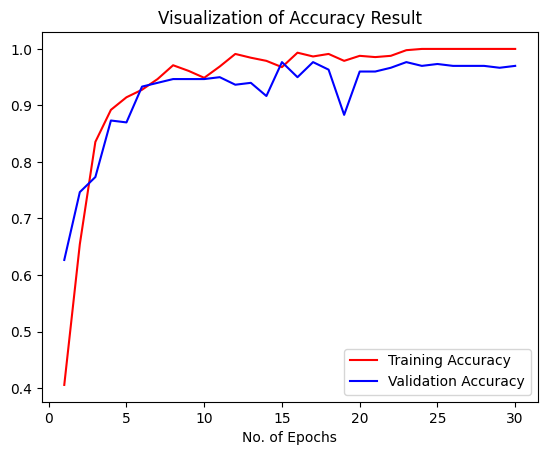

In [16]:
epochs=[i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


In [17]:
class_name=validation_set.class_names

In [18]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [19]:
y_pred=cnn.predict(test_set)
predicted_categories=tf.argmax(y_pred,axis=1)

300/300 [==============================] - 9s 30ms/step


In [20]:
true_categories=tf.concat([y for x, y in test_set],axis=0)
Y_true=tf.argmax(true_categories,axis=1)

In [21]:
Y_true

<tf.Tensor: shape=(300,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [22]:
predicted_categories

<tf.Tensor: shape=(300,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
     

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(Y_true,predicted_categories)

In [24]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

Potato___Early_blight       0.96      0.98      0.97       100
 Potato___Late_blight       0.97      0.94      0.95       100
     Potato___healthy       0.98      0.99      0.99       100

             accuracy                           0.97       300
            macro avg       0.97      0.97      0.97       300
         weighted avg       0.97      0.97      0.97       300



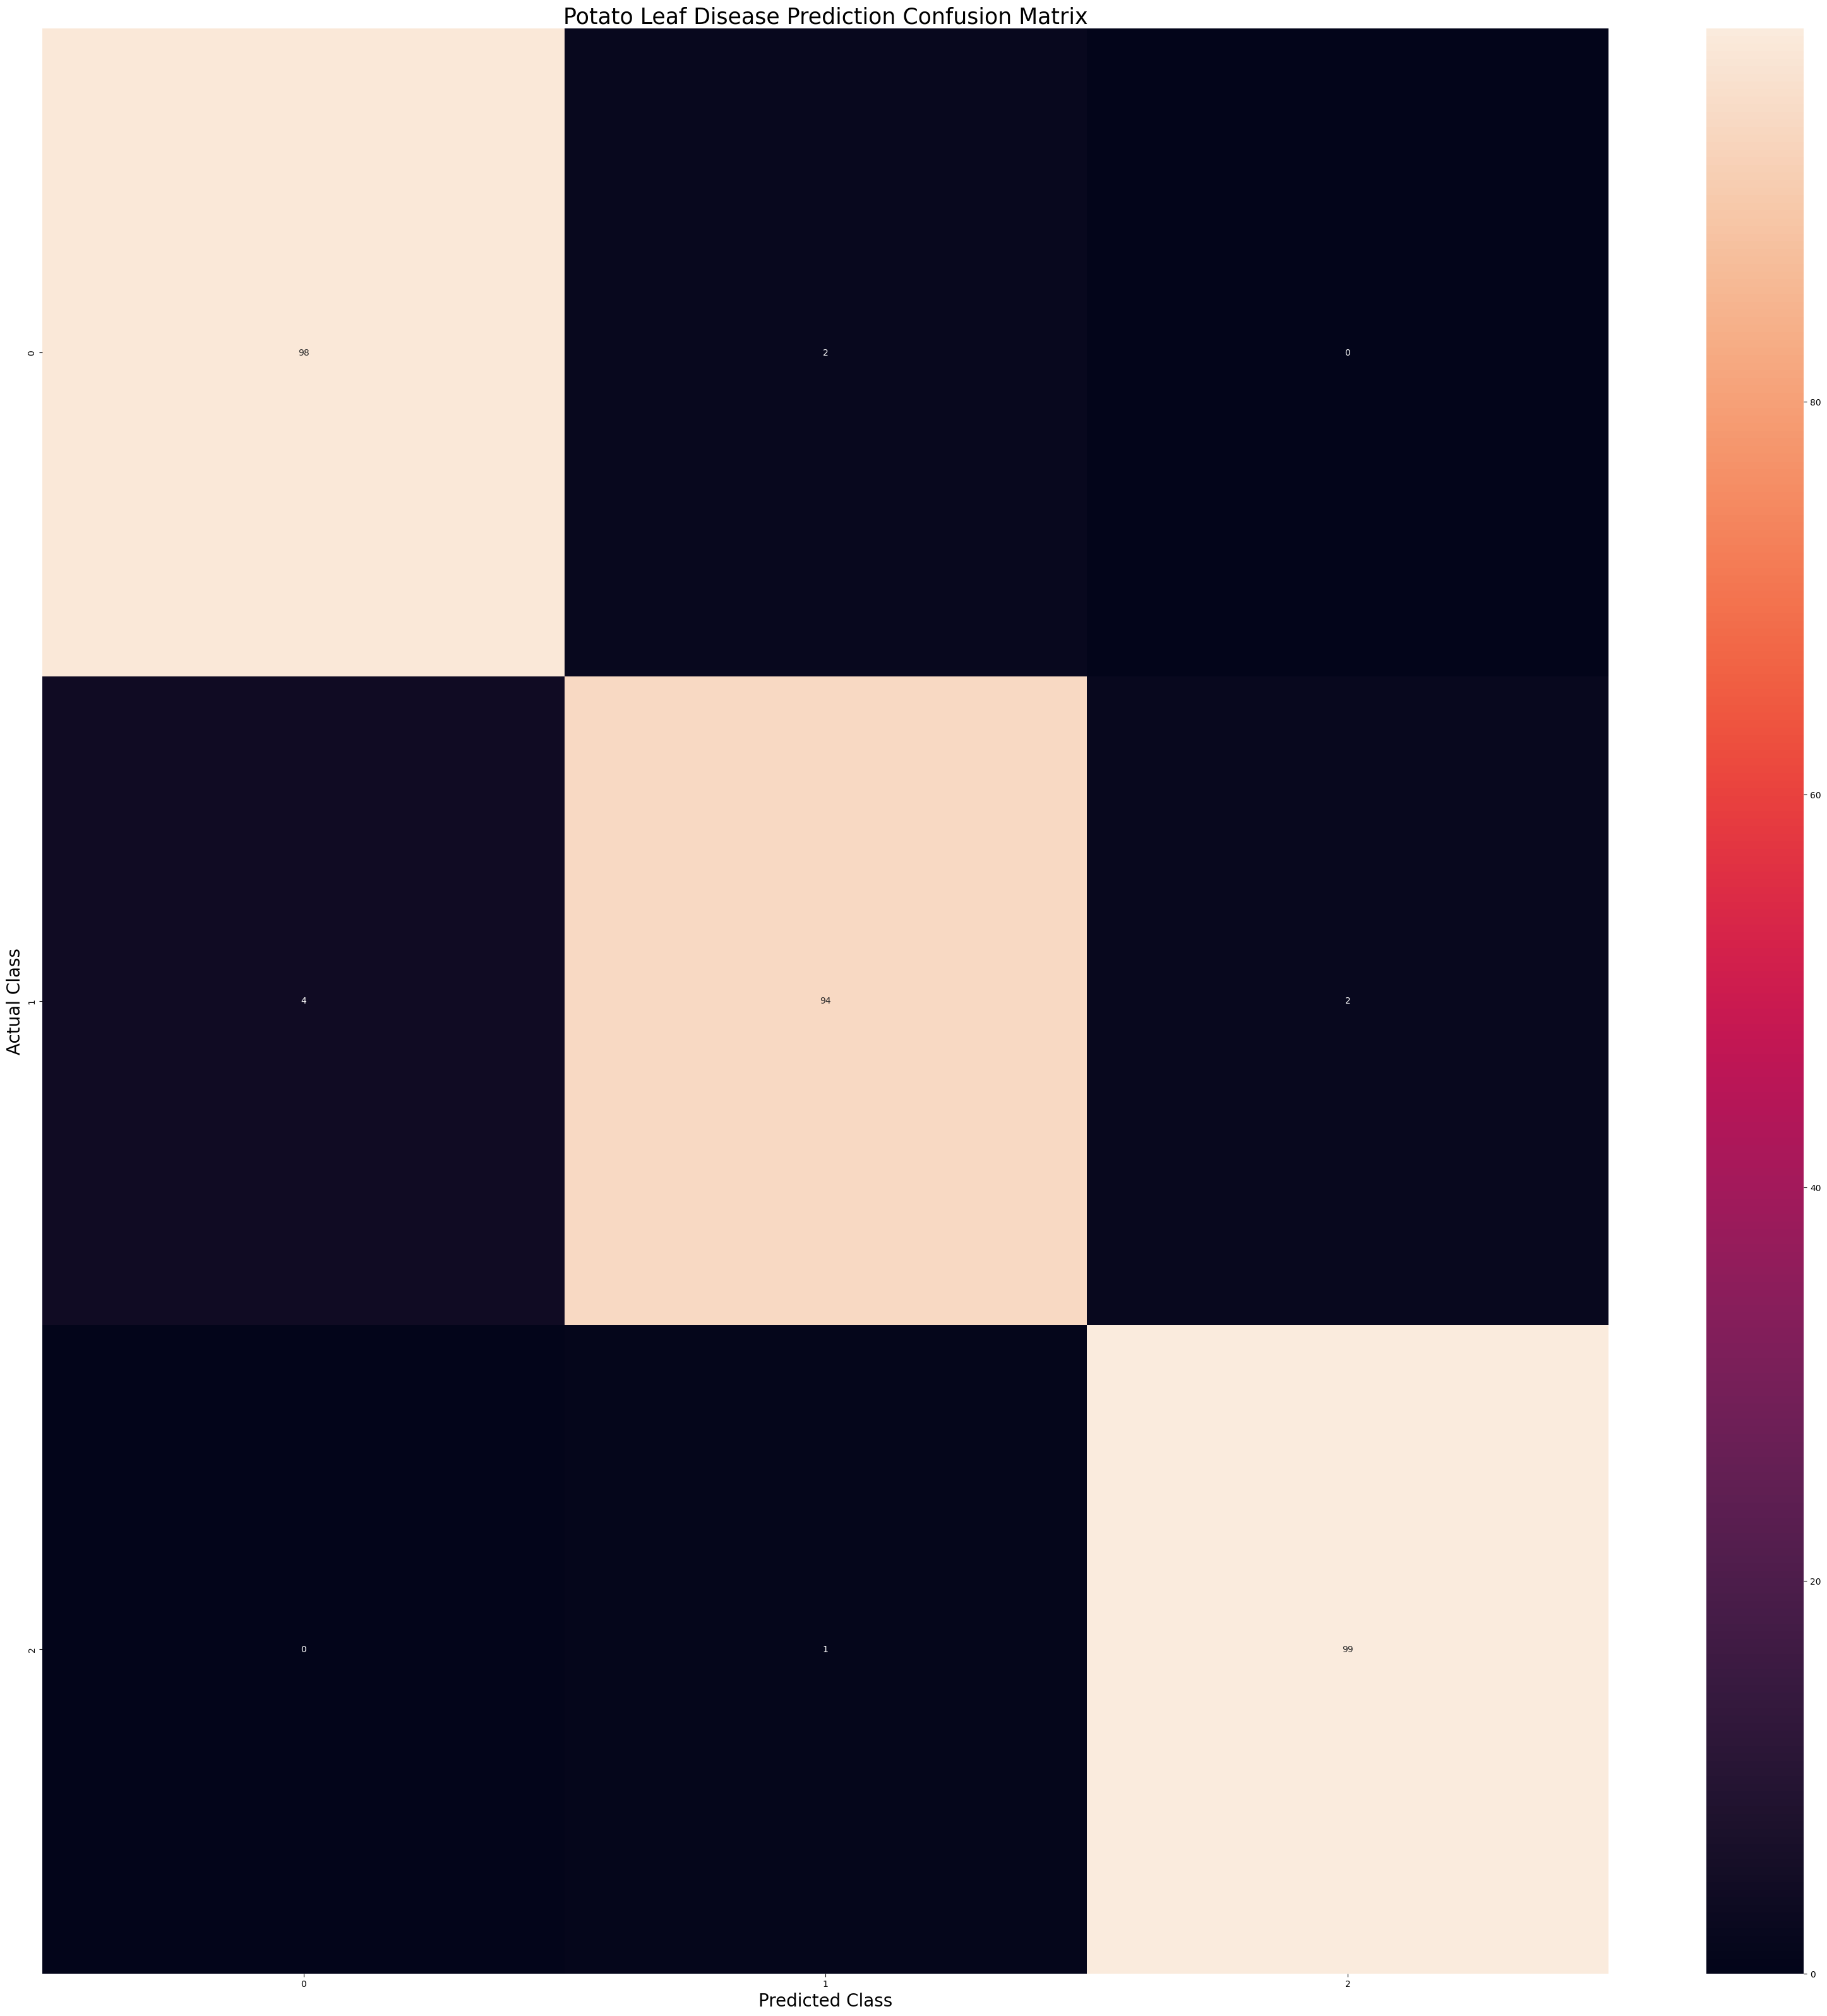

In [25]:
import seaborn as sns 
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})
plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Potato Leaf Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [27]:
import numpy as np
# import tensorflow as tf
print(np.__version__)

1.24.3
